#### Quiz: Analyzing Student Data

Consider a dataset containing information about students in a school. Use the following randomly generated data for the quiz as following template. The sample data should have following features: <br>
Student ID - RANGE (1-100) <br>
Class : A,B,C <br>
Gender: Male, Female <br>
Subject: EE, CS, SE <br>
Score: 40-100 <br>
##### Submission Guidelines 
Provide solution in given cell only. <br>
Don't write anything for question(s) you're not attempting. <br>
Rename the .ipynb file with following convention to get marked your questions -> 21F-1234_Q4

In [46]:
import pandas as pd
import numpy as np
import seaborn as snn
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate random student data
data = {
    'StudentID': np.arange(1, 101),
    'Class': np.random.choice(['A', 'B', 'C'], size=100),
    'Score1': np.random.randint(60, 100, size=100),
    'Score2': np.random.randint(60, 100, size=100),
    'Subject': np.random.choice(['CS', 'SE'], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100)
}

#Generate dataframe here
df = pd.DataFrame(data)
print (df)

    StudentID Class  Score1  Score2 Subject  Gender
0           1     C      67      85      SE    Male
1           2     A      83      91      CS    Male
2           3     C      70      65      SE  Female
3           4     C      76      91      CS  Female
4           5     A      67      63      SE  Female
..        ...   ...     ...     ...     ...     ...
95         96     A      91      67      SE    Male
96         97     A      92      86      SE  Female
97         98     C      60      86      SE  Female
98         99     A      78      93      SE  Female
99        100     A      61      80      CS    Male

[100 rows x 6 columns]


#### 1. Calculate the average score for each class using pivot table.

In [8]:

average_score_by_class = df.pivot_table(values=['Score1', 'Score2'], index='Class', aggfunc='mean')
print("Average Score by Class:")
print(average_score_by_class)


Average Score by Class:
          Score1     Score2
Class                      
A      80.303030  78.969697
B      82.277778  79.916667
C      78.838710  82.354839


#### 2. Find the total number of students in each class and gender.

In [9]:

total_students_by_class_gender = df.pivot_table(values='StudentID', index=['Class'], columns=df['Gender'].astype(str), aggfunc='count', fill_value=0)
print("\nTotal Number of Students")
print(total_students_by_class_gender)



Total Number of Students
Gender  Female  Male
Class               
A           17    16
B           19    17
C           16    15


#### 3. Create a pivot table to show the average score for each subject by gender.

In [13]:
pivot_table = pd.pivot_table(df, values=['Score1', 'Score2'], index='Gender', aggfunc=np.mean)
print (pivot_table)

           Score1     Score2
Gender                      
Female  80.230769  77.692308
Male    80.916667  83.250000


#### 4. Calculate the maximum score for each subject in each class.


In [12]:
max_score_by_subject_class = df.pivot_table(values=['Score1', 'Score2'], index='Class', aggfunc='max')
print("\nMaximum Score")
print(max_score_by_subject_class)



Maximum Score
       Score1  Score2
Class                
A          99      97
B          98      99
C          98      99


#### 5.1. Generate a stacked bar chart to represent the total number of students in each class and gender.

<Axes: xlabel='Class', ylabel='Count'>

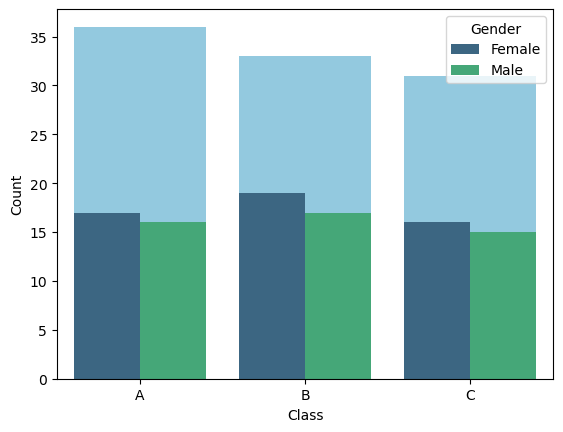

In [40]:
import seaborn as sns

class_counts = df['Class'].value_counts().reset_index()
class_counts
sns.barplot(x='index', y='Class', data=class_counts, color='skyblue')

class_gender_counts = df.groupby(['Class', 'Gender']).size().unstack().reset_index()

# Melt the DataFrame to long format for Seaborn
melted_df = pd.melt(class_gender_counts, id_vars='Class', var_name='Gender', value_name='Count')
sns.barplot(x='Class', y='Count', hue='Gender', data=melted_df, palette='viridis')



#### 5.2. Plot a scatter plot to visualize the relationship between scores in CS and SE.

<Axes: xlabel='Score2', ylabel='Score1'>

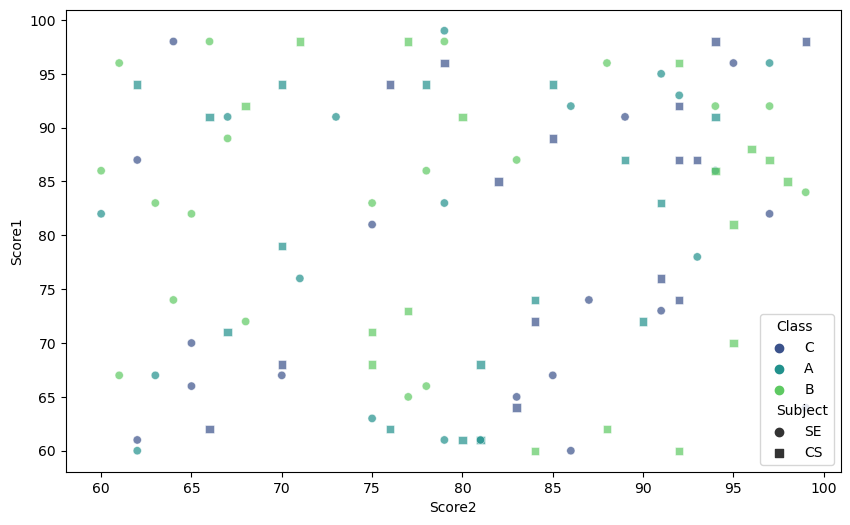

In [50]:
cs_se_df = df[df['Subject'].isin(['CS', 'SE'])]

# Plotting the scatter plot for CS and SE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score2', y='Score1', hue='Class', style='Subject', data=cs_se_df, palette='viridis', markers=['o', 's'], alpha=0.7)


#### 5.3. Create a line plot to display the trend of scores over the student IDs.

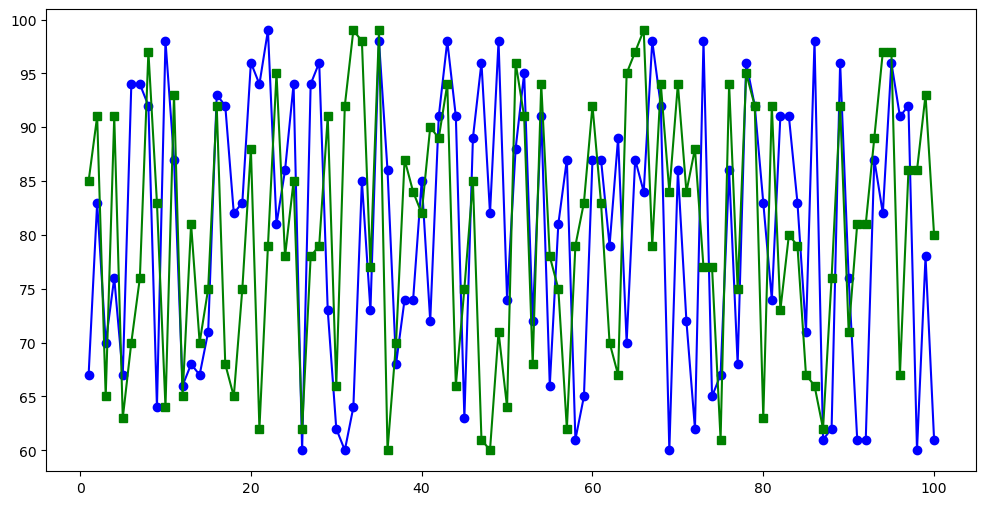

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df['StudentID'], df['Score1'], label='CS', marker='o', linestyle='-', color='blue')

# Line plot for Score_SE
plt.plot(df['StudentID'], df['Score2'], label='SE', marker='s', linestyle='-', color='green')
